In [1]:
import sys, os

# access library by adding project root to sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import numpy as np
import matplotlib.pyplot as plt

from fast_image_align_ot import align, utils, plots, images

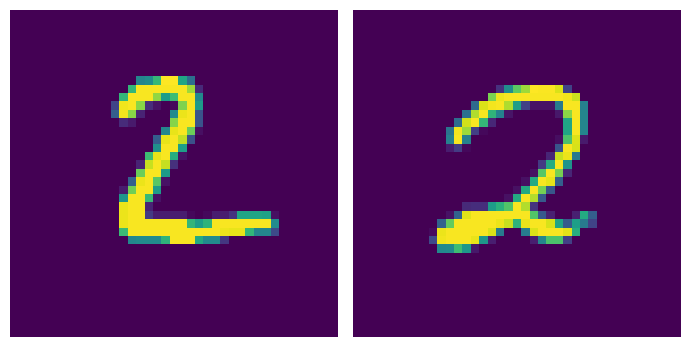

In [2]:
mnist_images = utils.load_mnist_images('../Data/t10k-images-idx3-ubyte.gz')

imgs = mnist_images[[1, 35]]  # two examples of "2" digits
imgs = utils.zero_pad_image_stack_to_size(imgs, 39)

imgs = images.Image(imgs).preprocess_images() # normalize the images

plots.two_imshow(imgs[0], imgs[1])

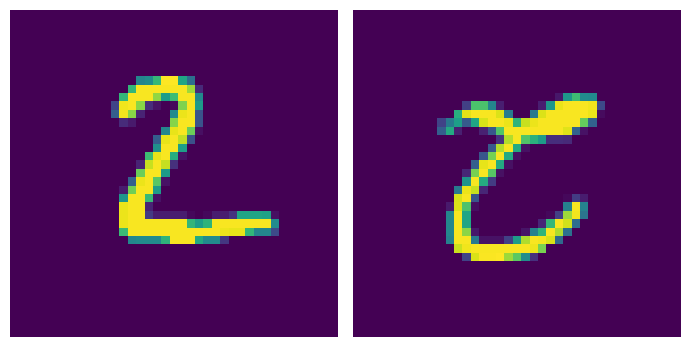

In [3]:
F = imgs[0]
G = utils.rotate(imgs[1], 180)  # rotate image for demo

plots.two_imshow(F, G)

### pick distances to align images in

alignment_l2 = align.align_euclidean(F, G)
alignment_sw = align.align_sw(F, G)
alignment_rfsw = align.align_rfsw(F, G)
alignment_w2 = align.align_w2(F, G)
# alignment_sd = align.align_sd(F, G)
# alignment_cwd = align.align_cwd(F, G)
# alignment_wemd = align.align_wemd(F, G)
# alignment_msw = align.align_msw(F, G)



distance over rotations


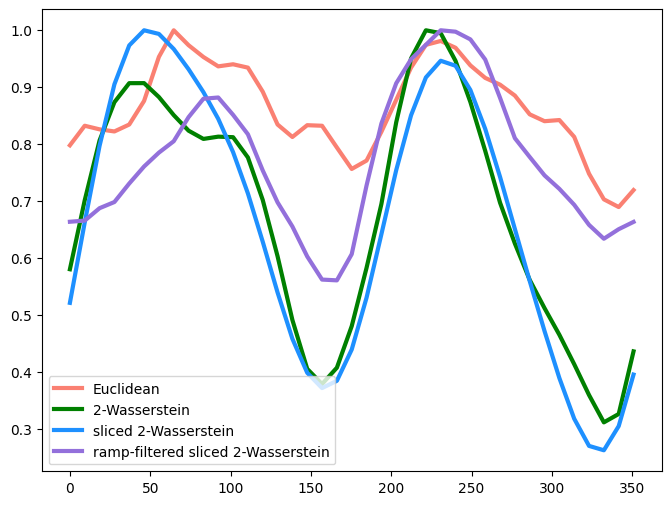



ramp-filtered sliced 2-Wasserstein distance alignment


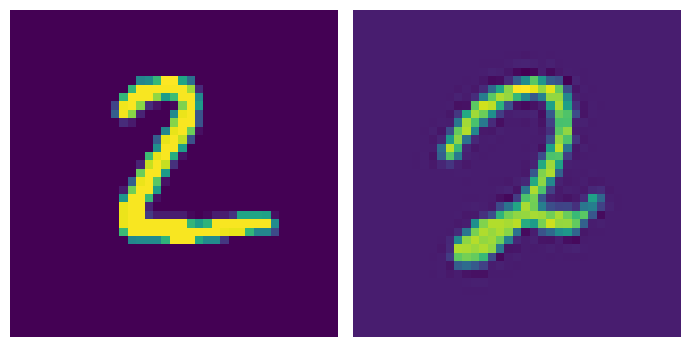

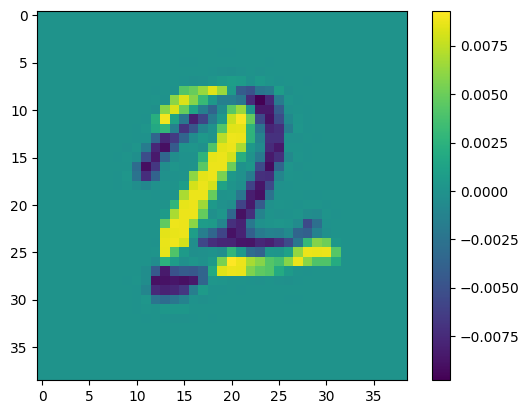



Euclidean distance alignment


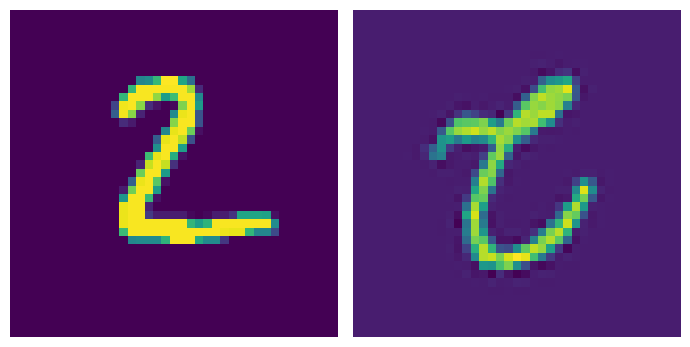

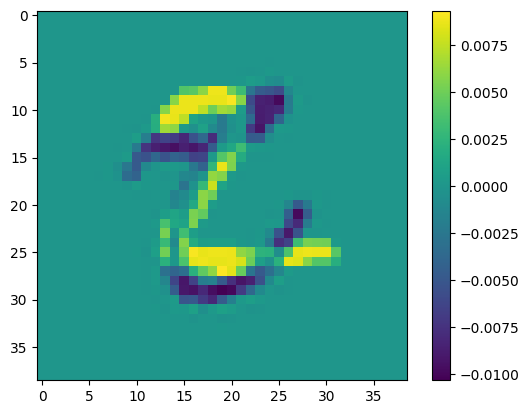

In [4]:
### plot normalized distances over rotations
print('\n')
print('distance over rotations')
plt.figure(figsize=(8,6))
plt.plot(alignment_l2['angles'], alignment_l2['distances'] / np.amax(alignment_l2['distances']), 
         linewidth=3, color='salmon', label='Euclidean')
plt.plot(alignment_w2['angles'], alignment_w2['distances'] / np.amax(alignment_w2['distances']),
         linewidth=3, color='green', label='2-Wasserstein')
plt.plot(alignment_sw['angles'], alignment_sw['distances'] / np.amax(alignment_sw['distances']),
         linewidth=3, color='dodgerblue', label='sliced 2-Wasserstein')
plt.plot(alignment_rfsw['angles'], alignment_rfsw['distances'] / np.amax(alignment_rfsw['distances']),
         linewidth=3, color='mediumpurple', label='ramp-filtered sliced 2-Wasserstein')
plt.legend()
plt.show()
print('\n')


print('ramp-filtered sliced 2-Wasserstein distance alignment')
plots.two_imshow(F, alignment_rfsw['aligned_image'])
plt.imshow(F - alignment_rfsw['aligned_image'])
plt.colorbar()
plt.show()

print('\n')
print('Euclidean distance alignment')
plots.two_imshow(F, alignment_l2['aligned_image'])
plt.imshow(F - alignment_l2['aligned_image'])
plt.colorbar()
plt.show()